In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets and projects/UK_monthly_gdp.csv")
df

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2
5,/06/2020,9.0
6,/07/2020,7.4
7,/08/2020,2.0
8,/09/2020,1.1
9,/10/2020,0.6


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df['Time Period'] = pd.to_datetime(df['Time Period'], format='/%m/%Y')

In [5]:
df

,Time Period,GDP Growth
0,2020-01-01,0.3
1,2020-02-01,-0.5
2,2020-03-01,-7.0
3,2020-04-01,-20.9
4,2020-05-01,3.2
5,2020-06-01,9.0
6,2020-07-01,7.4
7,2020-08-01,2.0
8,2020-09-01,1.1
9,2020-10-01,0.6


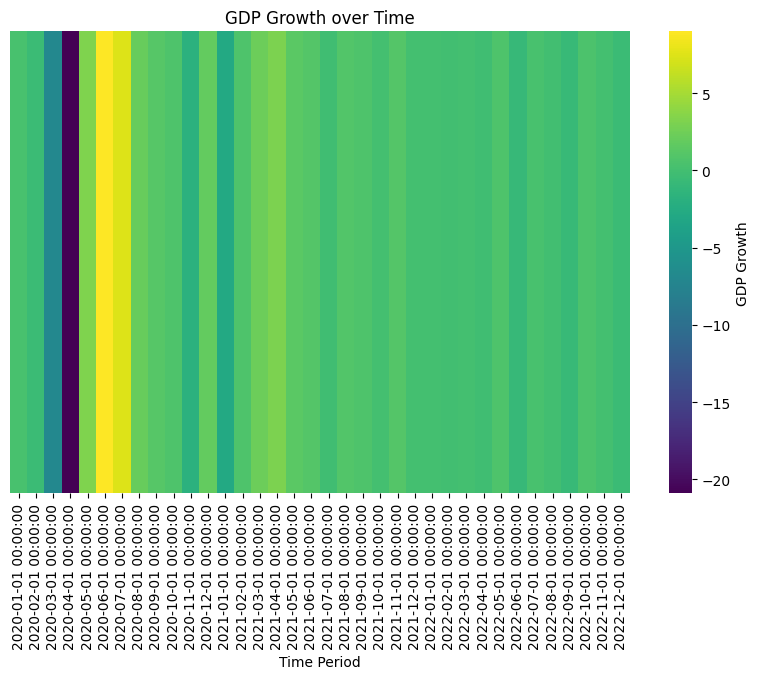

In [6]:
# Set the 'Time Period' column as index
df.set_index('Time Period', inplace=True)

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(df.T, cmap='viridis', xticklabels=df.index, yticklabels=False, cbar_kws={'label': 'GDP Growth'})

# Set the title and labels
plt.title('GDP Growth over Time')
plt.xlabel('Time Period')

# Display the heatmap
plt.show()

In [7]:
quarterly_data=df.resample('Q').mean()

<ipython-input-7-b7045ca00955>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data=df.resample('Q').mean()


In [8]:
quarterly_data

,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333
2021-06-30,1.800000
2021-09-30,0.433333
2021-12-31,0.400000
2022-03-31,0.066667


In [9]:
import numpy as np
quarterly_data['Recession'] = quarterly_data['GDP Growth'] < -1

# Fill missing values in the 'Recession' column with False
quarterly_data['Recession'].fillna(False, inplace=True)

# Create a figure with specific size
plt.figure(figsize=(10, 6))


<ipython-input-9-ce7c44e25c3b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  quarterly_data['Recession'].fillna(False, inplace=True)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

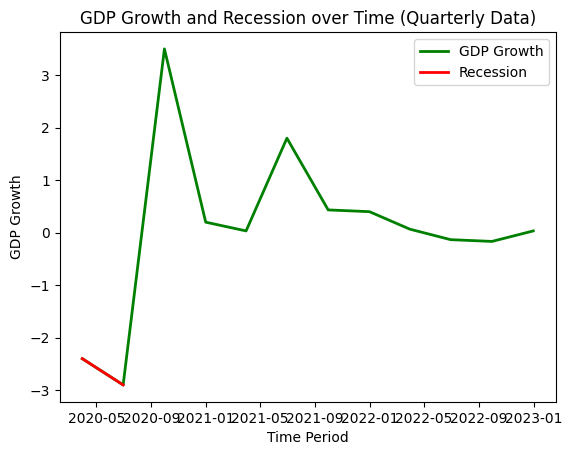

In [10]:
time_periods = quarterly_data.index.to_numpy()  # Convert the index to a NumPy array
gdp_growth = quarterly_data['GDP Growth'].to_numpy()
plt.plot(time_periods, gdp_growth, color='green', label='GDP Growth', linewidth=2)

# Isolate recession periods and plot them in red
recession_data = quarterly_data[quarterly_data['Recession'] == True]
recession_time_periods = recession_data.index.to_numpy()
recession_gdp_growth = recession_data['GDP Growth'].to_numpy()

# Plot recession periods in red
plt.plot(recession_time_periods, recession_gdp_growth, color='red', label='Recession', linewidth=2)

# Set the title, labels, and legend
plt.title('GDP Growth and Recession over Time (Quarterly Data)')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.legend()

# Display the plot
plt.show()

In [11]:
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()  # Duration is the number of quarters in the recession period
recession_severity = recession_periods['GDP Growth'].sum()  # Severity is the total GDP growth during the recession period
recession_data = pd.DataFrame({
    'Recession Duration': recession_duration,
    'Recession Severity': recession_severity
})

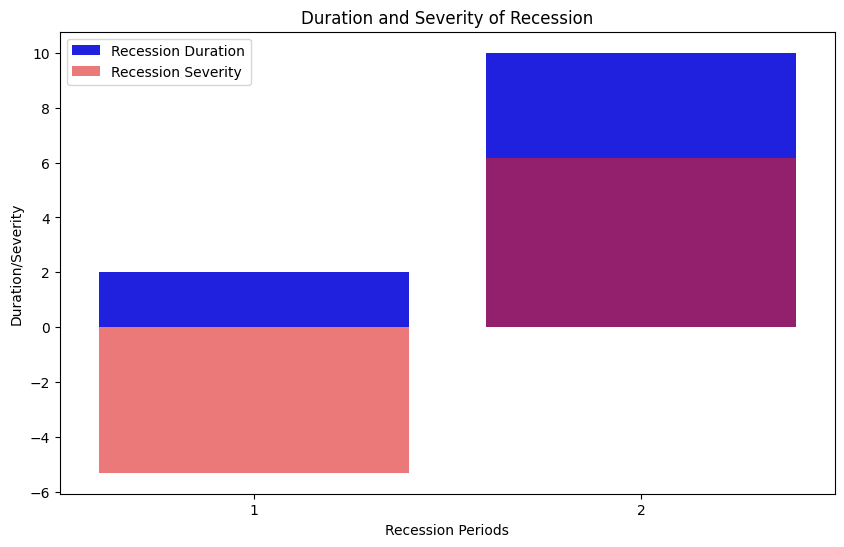

In [14]:
plt.figure(figsize=(10, 6))


sns.barplot(x=recession_data.index, y=recession_data['Recession Duration'], color='blue', label='Recession Duration')
sns.barplot(x=recession_data.index, y=recession_data['Recession Severity'], color='red', label='Recession Severity', alpha=0.6)

plt.title('Duration and Severity of Recession')
plt.xlabel('Recession Periods')
plt.ylabel('Duration/Severity')
plt.legend()

plt.show()